## Football Mod02 Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import sqlite3 
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

### The SQL Table names are as follows:
- Matches	
    - Match_ID, Div, Season, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
- Teams	
    - Season, TeamName, KaderHome, AvgAgeHome, ForeignPlayersHome, OverallMarketValueHome, AvgMarketValueHome, StadiumCapacity

- Teams_in_Matches	
    - Match_ID, Unique_Team_ID

- Unique_Teams	
    - TeamName, Unique_Team_ID

# Find The Names of All The Teams In The Dataset:

The total Number of Teams that are recorded in this dataset is most easily taken from the "Unique_Teams" SQL Table.

In [2]:
cur.execute("""SELECT TeamName, Unique_Team_ID
                FROM Unique_Teams
                ;""")
df_unique_teams = pd.DataFrame(cur.fetchall())
df_unique_teams.columns = [x[0] for x in cur.description]
df_unique_teams.shape

(128, 2)

In [3]:
unique_teams = sorted(list(set(df_unique_teams['TeamName'])))
len(unique_teams)

128

Just Double check against the matches to see if they aling.

In [4]:
cur.execute("""SELECT HomeTeam, AwayTeam 
                FROM matches
                ;""")
df_matches_teams = pd.DataFrame(cur.fetchall())
df_matches_teams.columns = [x[0] for x in cur.description]
df_matches_teams.head()

,HomeTeam,AwayTeam
0,Oberhausen,Kaiserslautern
1,Munich 1860,Kaiserslautern
2,Frankfurt FSV,Kaiserslautern
3,Frankfurt FSV,Karlsruhe
4,Ahlen,Karlsruhe


In [5]:
home_teams= list(df_matches_teams['HomeTeam'])
away_teams= list(df_matches_teams['AwayTeam'])
teams_2 = sorted(list(set(home_teams + away_teams)))
len(teams_2)

128

# The total number of goals scored by the team during the 2011 season

Create two SQL queries, one for home games and one for away. Then combine them to make a total goals for and against for each team. 

In [6]:
cur.execute("""SELECT HomeTeam, SUM(FTHG) AS TotalHGFor, SUM(FTAG) AS TotalHGAgainst
                FROM matches
                WHERE Season == 2011
                GROUP BY HomeTeam;""")
df_Home_2011 = pd.DataFrame(cur.fetchall())
df_Home_2011.columns = [x[0] for x in cur.description]
df_Home_2011.head()

,HomeTeam,TotalHGFor,TotalHGAgainst
0,Aachen,15,24
1,Arsenal,39,17
2,Aston Villa,20,25
3,Augsburg,20,19
4,Bayern Munich,49,6


In [7]:
cur.execute("""SELECT AwayTeam, SUM(FTAG) AS TotalAGFor, SUM(FTHG) AS TotalAGAgainst
                FROM matches
                WHERE Season == 2011
                GROUP BY AwayTeam;""")
df_Away_2011 = pd.DataFrame(cur.fetchall())
df_Away_2011.columns = [x[0] for x in cur.description]
df_Away_2011.head()

,AwayTeam,TotalAGFor,TotalAGAgainst
0,Aachen,15,23
1,Arsenal,35,32
2,Aston Villa,17,28
3,Augsburg,16,30
4,Bayern Munich,28,16


Check that the number of teams is the same. This should be correct but its good to double check.

In [8]:
teams_2011 = df_Home_2011['HomeTeam'] == df_Away_2011['AwayTeam']
teams_2011

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
dtype: bool

#### Make a combined table:

In [9]:
df_2011 = df_Home_2011.copy()

Goals For Team:

In [10]:
df_2011['TotalHGFor'] = df_Home_2011['TotalHGFor']
df_2011['TotalAGFor'] = df_Away_2011['TotalAGFor']

Goals Against Team:

In [11]:
df_2011['TotalHGAgainst'] = df_Home_2011['TotalHGAgainst']
df_2011['TotalAGAgainst'] = df_Away_2011['TotalAGAgainst']

Overall Goals & Goal Differance:

In [12]:
df_2011['TotalGFor'] = df_2011['TotalHGFor'] + df_2011['TotalAGFor']

In [13]:
df_2011['TotalGAgainst'] = df_2011['TotalHGAgainst'] + df_2011['TotalAGAgainst']

In [14]:
df_2011['GoalDiff'] = df_2011['TotalGFor'] - df_2011['TotalGAgainst']

In [15]:
df_2011.rename(columns={"HomeTeam": 'Team'}, inplace=True)

In [16]:
df_2011

,Team,TotalHGFor,TotalHGAgainst,TotalAGFor,TotalAGAgainst,TotalGFor,TotalGAgainst,GoalDiff
0,Aachen,15,24,15,23,30,47,-17
1,Arsenal,39,17,35,32,74,49,25
2,Aston Villa,20,25,17,28,37,53,-16
3,Augsburg,20,19,16,30,36,49,-13
4,Bayern Munich,49,6,28,16,77,22,55
5,Blackburn,26,33,22,45,48,78,-30
6,Bochum,23,23,18,32,41,55,-14
7,Bolton,23,39,23,38,46,77,-31
8,Braunschweig,21,15,16,20,37,35,2
9,Chelsea,41,24,24,22,65,46,19


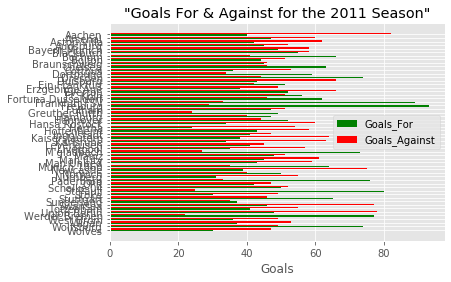

In [17]:
labels = sorted(df_2011['Team'], reverse=True)
goals_for = df_2011['TotalGFor']
goals_against = df_2011['TotalGAgainst']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, goals_for, width, label='Goals_For', color='g')
rects2 = ax.barh(x + width/2, goals_against, width, label='Goals_Against', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Goals')
ax.set_title('"Goals For & Against for the 2011 Season"')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# fig.tight_layout()
# plt.figure(figsize=([20,20]))

plt.show()

# The total number of wins the team earned during the 2011 season

For this question I want to create a table with dummy columns. Three Columns, HomeWin, AwayWin & Draw. There is a case for removing the Draw columns as if there is neither a HomeWin (=0) or an AwayWin (=0), then it must have been a draw. 

In [18]:
cur.execute("""SELECT HomeTeam, COUNT(FTR) AS HomeWins
                FROM matches
                WHERE Season == 2011 
                AND FTR == 'H'
                GROUP BY HomeTeam;""")
df_RH_2011 = pd.DataFrame(cur.fetchall())
df_RH_2011.columns = [x[0] for x in cur.description]
# df_RH_2011.head()

In [19]:
cur.execute("""SELECT AwayTeam, COUNT(FTR) AS AwayWins
                FROM matches
                WHERE Season == 2011 
                AND FTR == 'A'
                GROUP BY AwayTeam;""")
df_RA_2011 = pd.DataFrame(cur.fetchall())
df_RA_2011.columns = [x[0] for x in cur.description]
# df_RA_2011.head()

In [20]:
df_results_2011 = df_RH_2011.copy()
df_results_2011['AwayWins'] = df_RA_2011['AwayWins']
df_results_2011['WinTotal'] = df_results_2011['HomeWins'] + df_results_2011['AwayWins']
df_results_2011

,HomeTeam,HomeWins,AwayWins,WinTotal
0,Aachen,4,2,6
1,Arsenal,12,9,21
2,Aston Villa,4,3,7
3,Augsburg,6,2,8
4,Bayern Munich,14,9,23
5,Blackburn,6,2,8
6,Bochum,7,3,10
7,Bolton,4,6,10
8,Braunschweig,6,4,10
9,Chelsea,12,6,18


# A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)

Extract just Teams & the results for 2011, from the SQL data:

In [21]:
cur.execute("""SELECT HomeTeam, AwayTeam, FTR
                FROM matches
                WHERE Season == 2011
                ;""")
df_result_2011 = pd.DataFrame(cur.fetchall())
df_result_2011.columns = [x[0] for x in cur.description]
# df_result_2011

Create a list of the Unique teams for the 2011 Season:

In [22]:
teams = sorted(list(set((df_result_2011['HomeTeam']))))

Create the dummy columns from this:

In [23]:
result_dummies = pd.get_dummies(df_result_2011['FTR'])
df_result_2011 = pd.concat([df_result_2011,result_dummies], axis=1)
df_result_2011.drop(columns=['FTR'], inplace=True)
# df_result_2011

Create the blank Table of just the teams for 2011:

In [24]:
# teams_dict = dict(teams, "H":0, D=0, A=0)
blanks_r = [0]*(len(teams))
df_2011_HDA = pd.DataFrame(columns={'Team_2011':teams,
                                    'HomeWins':blanks_r,
                                    'HomeDraws':blanks_r, 
                                    'HomeLoss':blanks_r,
                                    'AwayWins':blanks_r,
                                    'AwayDraws':blanks_r, 
                                    'AwayLoss':blanks_r})
df_2011_HDA['Team_2011']=teams
df_2011_HDA['HomeWins']=blanks_r
df_2011_HDA['HomeDraws']=blanks_r
df_2011_HDA['HomeLoss']=blanks_r
df_2011_HDA['AwayWins']=blanks_r
df_2011_HDA['AwayDraws']=blanks_r
df_2011_HDA['AwayLoss']=blanks_r
# df_2011_HDA

Create functions that for each team 

In [25]:
def home_results_counter(team):
    df_Hteam = df_result_2011.loc[df_result_2011.HomeTeam == team]
    win_Hsum = df_Hteam['H'].sum()
    draw_Hsum = df_Hteam['D'].sum()
    loss_Hsum = df_Hteam['A'].sum()
    
    return [win_Hsum, draw_Hsum, loss_Hsum]

In [26]:
def away_results_counter(team):
    df_Ateam = df_result_2011.loc[df_result_2011.AwayTeam == team]
    win_Asum = df_Ateam['A'].sum()
    draw_Asum = df_Ateam['D'].sum()
    loss_Asum = df_Ateam['H'].sum()
    
    return [win_Asum, draw_Asum, loss_Asum]

Check the functions work:

In [27]:
print("Aachen Result Home (W/D/L):",home_results_counter('Aachen'), "\n\nAachen Result Away (W/D/L):", away_results_counter('Aachen'))

Aachen Result Home (W/D/L): [4, 6, 7] 

Aachen Result Away (W/D/L): [2, 7, 8]


Create function to do it for each team in the Table of just the teams for 2011:

In [28]:
def results_to_table(teams):
    i = 0
    for team in teams:
        r_home = home_results_counter(team)
        df_2011_HDA.HomeWins[i] = r_home[0]
        df_2011_HDA.HomeDraws[i] = r_home[1]
        df_2011_HDA.HomeLoss[i] = r_home[2]
        
        r_away = away_results_counter(team)
        df_2011_HDA['AwayWins'][i] = r_away[0]
        df_2011_HDA['AwayDraws'][i] =r_away[1]
        df_2011_HDA['AwayLoss'][i] =r_away[2]
        
        i += 1

In [29]:
results_to_table(df_2011_HDA.Team_2011)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopy

In [30]:
# df_2011_HDA

Add Total's & Games Played to table:

In [31]:
df_2011_HDA['TotalWins'] = df_2011_HDA['HomeWins'] + df_2011_HDA['AwayWins']
df_2011_HDA['TotalDraws'] = df_2011_HDA['HomeDraws'] + df_2011_HDA['AwayDraws']
df_2011_HDA['TotalLoss'] = df_2011_HDA['HomeLoss'] + df_2011_HDA['AwayLoss']
df_2011_HDA['GamesPlayed'] = (df_2011_HDA['HomeWins'] + df_2011_HDA['AwayWins']
                              + df_2011_HDA['HomeDraws'] + df_2011_HDA['AwayDraws']
                              +df_2011_HDA['HomeLoss'] + df_2011_HDA['AwayLoss'])
df_2011_HDA

,Team_2011,HomeWins,HomeDraws,HomeLoss,AwayWins,AwayDraws,AwayLoss,TotalWins,TotalDraws,TotalLoss,GamesPlayed
0,Aachen,4,6,7,2,7,8,6,13,15,34
1,Arsenal,12,4,3,9,3,7,21,7,10,38
2,Aston Villa,4,7,8,3,10,6,7,17,14,38
3,Augsburg,6,7,4,2,7,8,8,14,12,34
4,Bayern Munich,14,1,2,9,3,5,23,4,7,34
5,Blackburn,6,1,12,2,6,11,8,7,23,38
6,Bochum,7,3,7,3,4,10,10,7,17,34
7,Bolton,4,4,11,6,2,11,10,6,22,38
8,Braunschweig,6,8,3,4,7,6,10,15,9,34
9,Chelsea,12,3,4,6,7,6,18,10,10,38


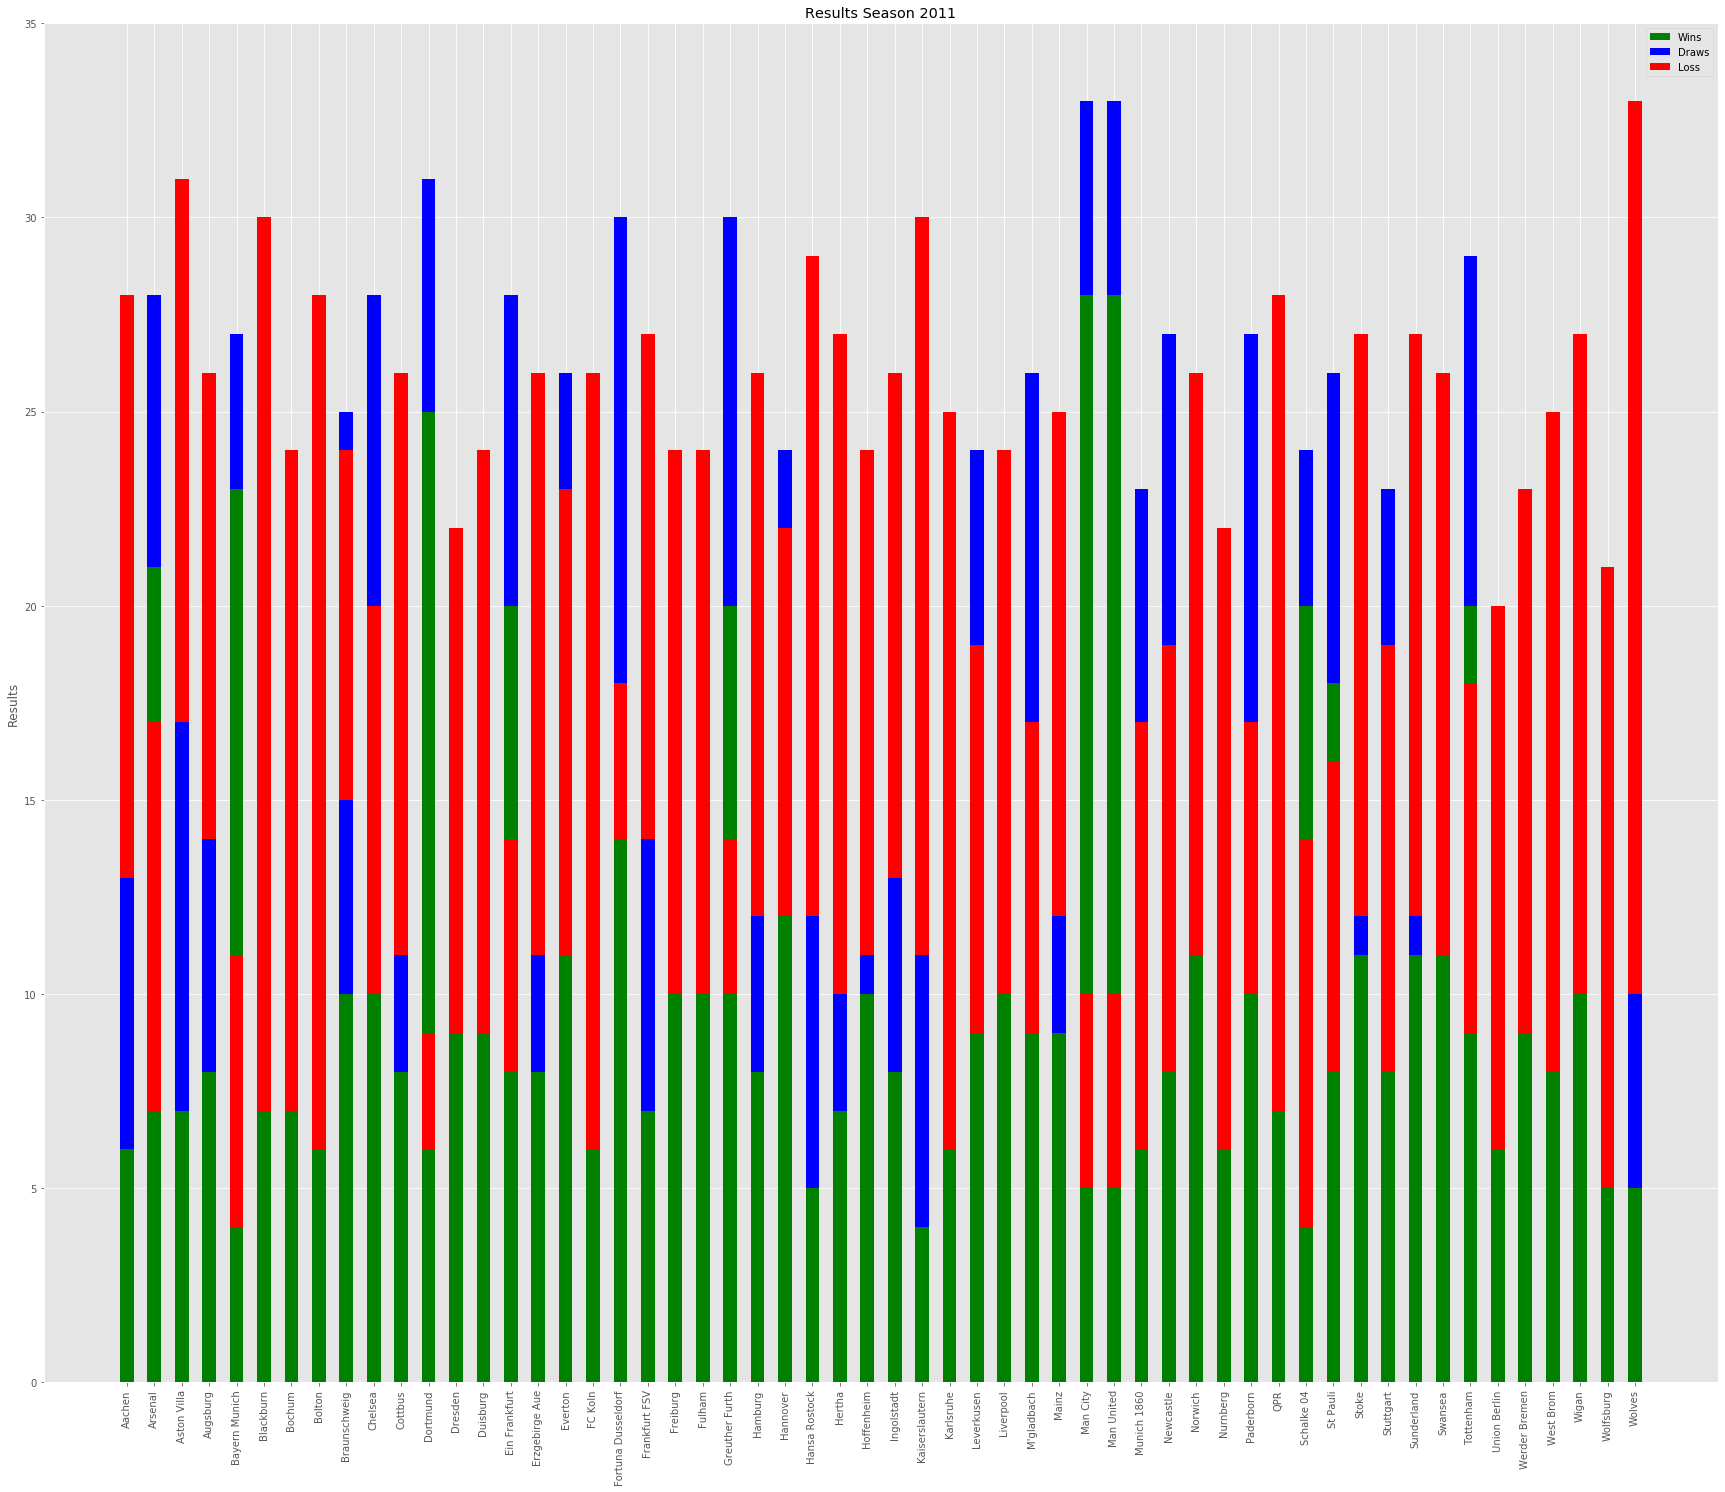

In [32]:
N = len(df_2011_HDA['Team_2011'])
ind = np.arange(N)    # the x locations for the groups
width = 0.5      # the width of the bars: can also be len(x) sequence

plt.figure(figsize=([30,25]))
p1 = plt.bar(ind, df_2011_HDA['TotalWins'], width, color='g')
p2 = plt.bar(ind, df_2011_HDA['TotalDraws'], width, bottom= df_2011_HDA['TotalWins'], color='b')
p3 = plt.bar(ind, df_2011_HDA['TotalLoss'], width, bottom= df_2011_HDA['TotalDraws'], color='r')

plt.ylabel('Results')
plt.title('Results Season 2011')
plt.xticks(ind, df_2011_HDA['Team_2011'], rotation=90)
plt.yticks(np.arange(0, 40, 5))
plt.legend((p1[0], p2[0], p3[0]), ('Wins', 'Draws', 'Loss'))

# The team's win percentage on days where it was raining during games in the 2011 season.

Create a table with the dates and the teams for each game in consecutive ordered by date for the 2011 season:

SQL ->

Matches: Match_ID*, Div, Season, Date, HomeTeam, AwayTeam, FTR

Teams_In Matches: Match_ID*, Unique_Team_ID*

Unique_Teams: TeamName, Unique_Team_ID*

In [33]:
cur.execute("""SELECT Match_ID, Div, Season, Date, HomeTeam, AwayTeam, FTR
                FROM Matches
                WHERE Season == 2011
                ORDER BY Date;""")
df_matches_2011 = pd.DataFrame(cur.fetchall())
df_matches_2011.columns = [x[0] for x in cur.description]
df_matches_2011

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTR
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,H
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,A
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,D
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,H
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,H
...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,A


Split the columns like before in question 3, using the dummies & concat method.

In [34]:
result_dummies = pd.get_dummies(df_matches_2011['FTR'])
df_matches_2011 = pd.concat([df_matches_2011,result_dummies], axis=1)
# df_matches_2011.drop(columns=['FTR'], inplace=True)
# df_matches_2011

Split by league & Then also create a sepearte one without the English Teams

In [35]:
df_matches_2011['Div'].unique()

array(['D2', 'D1', 'E0'], dtype=object)

In [36]:
df_D1_2011 = df_matches_2011.loc[df_matches_2011['Div'] == 'D1']
df_D2_2011 = df_matches_2011.loc[df_matches_2011['Div'] == 'D2']
df_E0_2011 = df_matches_2011.loc[df_matches_2011['Div'] == 'E0']
df_German_2011 = df_matches_2011.loc[df_matches_2011['Div'] != 'E0']

We will firstly just have the weather set to Berlin as default, as of the parameters set by the question. Below is a list of the information we require:  

1. Berlin Longitude & Latitude
    
    52.5200° N, 13.4050° E


2. List of all the date for the weather conditions we need to gather. 
    
    Setting the time to 7pm 

In [37]:
berlin_loc = "52.5200, 13.4050"

In [38]:
dates_list = df_German_2011['Date']

In [39]:
dates = []
for date in dates_list:
    new_date = date + "T19:00:00"
    dates.append(new_date)

dates[:5]

['2011-07-15T19:00:00',
 '2011-07-15T19:00:00',
 '2011-07-15T19:00:00',
 '2011-07-16T19:00:00',
 '2011-07-16T19:00:00']

## Import the Packages & Extract the API Key

This has been commented out as it has been exported to a CSV for repeated use.

In [40]:
# import json
# import requests

# def get_key(path):
#     with open(path) as file:
#         return json.load(file)

# keys = get_key("/Users/matthewnewton/Desktop/Matt_Mod02_Project/API_Key")

# api_key = keys["API_Key"]
# print(api_key)

Create a function that will put request in to DarkSky for the weather on the dates in our list.

In [41]:
# outcome = []
# for date in dates:
#     url = f"https://api.darksky.net/forecast/{api_key}/{berlin_loc},{date}"
    
#     response = requests.get(url)
#     outcome.append(response)

In [42]:
# class WeatherGetter(object):
    
#     def __init__(self):
#         # Set secrets & keys from the .env file
#         self.BASE_URL = "https://api.darksky.net/"
#         self.token = os.getenv('Darksky_api')
        
#     def get_weather_for_date(self, date):
#         forecast = request.get(f"{self.BASE_URL}/forcast/{self.token}/{berlin_loc},{date}").json('')
#         return forecast

In [43]:
# outcome[:5]

In [44]:
# weather = []
# for x in outcome:
#     if "icon" not in x.json()['currently'].keys():
#         weather.append('NA')
#     else:
#         weather.append(x.json()['currently']['icon'])
# weather

In [45]:
# df_weather = pd.DataFrame(weather)
# df_weather.to_csv(r'/Users/matthewnewton/Desktop/Matt_Mod02_Project/Berlin_Weather.csv')

## Importing the previously saved CSV of the weather and adding it to the DataFrame

In [46]:
df_weather = pd.read_csv('Berlin_Weather.csv')
df_weather.drop(columns='Unnamed: 0', inplace=True)

In [47]:
df_German_2011['weather'] = df_weather['0']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_German_2011['weather']

0      partly-cloudy-day
1      partly-cloudy-day
2      partly-cloudy-day
3                    NaN
4                    NaN
             ...        
968                  NaN
969                  NaN
970                  NaN
971                  NaN
972                  NaN
Name: weather, Length: 612, dtype: object

In [49]:
df_German_2011.head(30)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTR,A,D,H,weather
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,H,0,0,1,partly-cloudy-day
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,A,1,0,0,partly-cloudy-day
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,D,0,1,0,partly-cloudy-day
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,H,0,0,1,NaN
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,H,0,0,1,NaN
5,1146,D2,2011,2011-07-17,Karlsruhe,Duisburg,H,0,0,1,partly-cloudy-day
6,1442,D2,2011,2011-07-17,Braunschweig,Munich 1860,H,0,0,1,partly-cloudy-day
7,1602,D2,2011,2011-07-17,Hansa Rostock,Paderborn,A,1,0,0,partly-cloudy-day
8,1360,D2,2011,2011-07-18,Fortuna Dusseldorf,Bochum,H,0,0,1,NaN
9,1505,D2,2011,2011-07-22,Duisburg,Cottbus,A,1,0,0,rain


In [50]:
df_German_2011.weather.unique()

array(['partly-cloudy-day', nan, 'rain', 'clear-day', 'clear-night',
       'partly-cloudy-night', 'cloudy', 'fog'], dtype=object)

In [51]:
df_German_2011.weather.isna().sum()

394

### Randomly asinging the NA values with propotionate weather

"NA" is the the largest value in this which is not a good sign in infer from this weather data. 

In [52]:
df_weather_notNA = df_German_2011.loc[df_German_2011.weather.notna()]

(array([90.,  4.,  0.,  9.,  0.,  8., 96.,  0.,  4.,  7.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

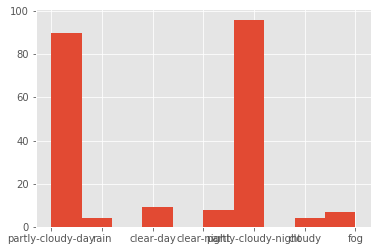

In [53]:
plt.hist(df_weather_notNA.weather)

In [54]:
df_weather_notNA.weather.value_counts(normalize=True)

partly-cloudy-night    0.440367
partly-cloudy-day      0.412844
clear-day              0.041284
clear-night            0.036697
fog                    0.032110
cloudy                 0.018349
rain                   0.018349
Name: weather, dtype: float64

In [55]:
p = np.array([0.440367, 0.412844, 0.041284, 0.036697, 0.032110, 0.018349, 0.018349])
p.sum()

0.9999999999999998

In [56]:
# p = np.array([0.471591, 0.397727, 0.034091, 0.028409, 0.025568, 0.025568, 0.017045])
# p.sum() 

In [57]:
p_adjust = np.array([(0.440367+(1-p.sum())), 0.412844, 0.041284, 0.036697, 0.032110, 0.018349, 0.018349])

In [58]:
choice = list(df_weather_notNA.weather.unique())

In [59]:
df_German_2011.weather = df_German_2011.weather.map(lambda x: np.random.choice(choice, 1, p= p_adjust)[0]
                                           if pd.isnull(x) else x)
df_German_2011.weather.value_counts()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


partly-cloudy-day      282
rain                   160
partly-cloudy-night    103
clear-day               23
clear-night             20
fog                     15
cloudy                   9
Name: weather, dtype: int64

In [60]:
df_German_2011

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTR,A,D,H,weather
0,1133,D2,2011,2011-07-15,Cottbus,Dresden,H,0,0,1,partly-cloudy-day
1,1167,D2,2011,2011-07-15,Greuther Furth,Ein Frankfurt,A,1,0,0,partly-cloudy-day
2,1551,D2,2011,2011-07-15,Frankfurt FSV,Union Berlin,D,0,1,0,partly-cloudy-day
3,1550,D2,2011,2011-07-16,Erzgebirge Aue,Aachen,H,0,0,1,rain
4,1678,D2,2011,2011-07-16,St Pauli,Ingolstadt,H,0,0,1,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...
968,1528,D2,2011,2012-05-06,Hansa Rostock,Greuther Furth,D,0,1,0,rain
969,1540,D2,2011,2012-05-06,Munich 1860,Aachen,A,1,0,0,clear-night
970,1552,D2,2011,2012-05-06,Cottbus,Union Berlin,H,0,0,1,partly-cloudy-day
971,1610,D2,2011,2012-05-06,St Pauli,Paderborn,H,0,0,1,rain


## Creating the weather win rate:

In [61]:
weather_unique = sorted(list(df_German_2011.weather.unique()))
weather_unique

['clear-day',
 'clear-night',
 'cloudy',
 'fog',
 'partly-cloudy-day',
 'partly-cloudy-night',
 'rain']

In [62]:
weather_dummies = pd.get_dummies(df_German_2011['weather'])
df_German_2011 = pd.concat([df_German_2011,weather_dummies], axis=1)
df_weather_G_2011 = df_German_2011.drop(columns=['weather'])
df_weather_G_2011.drop(columns=['Match_ID','Div','Season','Date','FTR'], inplace=True)

In [63]:
df_weather_G_2011

,HomeTeam,AwayTeam,A,D,H,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain
0,Cottbus,Dresden,0,0,1,0,0,0,0,1,0,0
1,Greuther Furth,Ein Frankfurt,1,0,0,0,0,0,0,1,0,0
2,Frankfurt FSV,Union Berlin,0,1,0,0,0,0,0,1,0,0
3,Erzgebirge Aue,Aachen,0,0,1,0,0,0,0,0,0,1
4,St Pauli,Ingolstadt,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,Hansa Rostock,Greuther Furth,0,1,0,0,0,0,0,0,0,1
969,Munich 1860,Aachen,1,0,0,0,1,0,0,0,0,0
970,Cottbus,Union Berlin,0,0,1,0,0,0,0,1,0,0
971,St Pauli,Paderborn,0,0,1,0,0,0,0,0,0,1


## Percentage wins in rain to not rain

In [64]:
def home_results_counter_yes_rain(team):
    df_Hteam = df_weather_G_2011.loc[(df_weather_G_2011.HomeTeam == team) & (df_weather_G_2011.rain == 1)]
    win_Hsum = df_Hteam['H'].sum()
    draw_Hsum = df_Hteam['D'].sum()
    loss_Hsum = df_Hteam['A'].sum()
    
    return [win_Hsum, draw_Hsum, loss_Hsum]

In [65]:
def away_results_counter_yes_rain(team):
    df_Ateam = df_weather_G_2011.loc[(df_weather_G_2011.AwayTeam == team) & (df_weather_G_2011.rain == 1)]
    win_Asum = df_Ateam['A'].sum()
    draw_Asum = df_Ateam['D'].sum()
    loss_Asum = df_Ateam['H'].sum()
    
    return [win_Asum, draw_Asum, loss_Asum]

In [66]:
home_results_counter_yes_rain('Cottbus')

[0, 3, 1]

In [67]:
# def home_results_counter_not_rain(team):
#     df_Hteam = df_weather_G_2011.loc[(df_weather_G_2011.HomeTeam == team) & (df_weather_G_2011.rain != 1)]
#     win_Hsum = df_Hteam['H'].sum()
#     draw_Hsum = df_Hteam['D'].sum()
#     loss_Hsum = df_Hteam['A'].sum()
    
#     return [win_Hsum, draw_Hsum, loss_Hsum]

In [68]:
# def away_results_counter_not_rain(team):
#     df_Ateam = df_weather_G_2011.loc[(df_weather_G_2011.AwayTeam == team) & (df_weather_G_2011.rain != 1)]
#     win_Asum = df_Ateam['A'].sum()
#     draw_Asum = df_Ateam['D'].sum()
#     loss_Asum = df_Ateam['H'].sum()
    
#     return [win_Asum, draw_Asum, loss_Asum]

In [69]:
GWeather_results = sorted(list(df_German_2011.HomeTeam.unique()))

In [75]:
blanks_r = [0]*(len(GWeather_results))
df_German_rain = pd.DataFrame(columns={'German_2011':GWeather_results,
                                    'RainWins':blanks_r,
                                    'RainDraws':blanks_r, 
                                    'RainLoss':blanks_r,
                                    })
df_German_rain['German_2011']=GWeather_results
df_German_rain['RainWins']=blanks_r
df_German_rain['RainDraws']=blanks_r
df_German_rain['RainLoss']=blanks_r
# df_German_rain

In [76]:
def results_to_table_rain(teams):
    # Home = Rain // Away = Not Rain
    i = 0
    for team in teams:
        r_home = home_results_counter_yes_rain(team)
        r_away = away_results_counter_yes_rain(team)
        df_German_rain.RainWins[i] = (r_home[0]+r_away[0])
        df_German_rain.RainDraws[i] = (r_home[1]+r_away[1])
        df_German_rain.RainLoss[i] = (r_home[2]+r_away[2])
        i += 1

In [77]:
results_to_table_rain(df_German_rain.German_2011)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [78]:
df_German_rain

,German_2011,RainWins,RainDraws,RainLoss
0,Aachen,0,3,5
1,Augsburg,3,3,5
2,Bayern Munich,7,0,0
3,Bochum,4,4,8
4,Braunschweig,1,5,1
5,Cottbus,1,4,5
6,Dortmund,4,2,1
7,Dresden,3,3,1
8,Duisburg,1,4,4
9,Ein Frankfurt,7,1,1


## Now We have the wins for rain we can compare that to the list created in Part 4

In [81]:
# Just the German teams for part 4 only play 34 games rather than the English 38
df_2011_HDA_German = df_2011_HDA.loc[df_2011_HDA.GamesPlayed == 34]
df_2011_HDA_German.drop(columns = ['HomeWins','HomeDraws','HomeLoss', 'AwayWins', 'AwayDraws', 'AwayLoss'], inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [83]:
df_2011_HDA_German['RainWins'] = df_German_rain.RainWins
df_2011_HDA_German['RainDraws'] = df_German_rain.RainDraws
df_2011_HDA_German['RainLoss'] = df_German_rain.RainLoss
df_2011_HDA_German

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Team_2011,TotalWins,TotalDraws,TotalLoss,GamesPlayed,RainWins,RainDraws,RainLoss
0,Aachen,6,13,15,34,0.0,3.0,5.0
3,Augsburg,8,14,12,34,4.0,4.0,8.0
4,Bayern Munich,23,4,7,34,1.0,5.0,1.0
6,Bochum,10,7,17,34,4.0,2.0,1.0
8,Braunschweig,10,15,9,34,1.0,4.0,4.0
10,Cottbus,8,11,15,34,2.0,2.0,5.0
11,Dortmund,25,6,3,34,2.0,0.0,3.0
12,Dresden,12,9,13,34,3.0,2.0,1.0
13,Duisburg,10,9,15,34,2.0,3.0,3.0
14,Ein Frankfurt,20,8,6,34,3.0,0.0,5.0
